In [2]:
# function to compute Laplace transform generalised laplacian matrix
# for a given value of lambda

import networkx as nx
import numpy as np
import itertools 

def kplaplacian_ltf(G,lam):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -np.exp(-lam*k)
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

In [3]:
# function to compute Mellin transform generalised laplacian matrix
# for a given value of s

def kplaplacian_mtf(G,s):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -(1/pow(k,s))
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

In [4]:
### Function to compute zeta function ####
### eiglst is the list of eigenvalues ####
### s is the parameter of the zeta function ####

def zeta_function_origin(eiglst):     # function with parameter as the sorted (ascending) eigenvalue list
    sum=0                             # set sum to zero
    for n in eiglst[1:]:              # iterate over the eigenvalue list starting from the second smallest nonzero eigenvalue
        sum = sum+(-1*np.log(n))      # increment the sum with natural log of the eigenvalue
    return sum                        # return the sum

In [5]:
# function to compute the normalised generalised Laplacian matrix

def normalised_genlap(L):           # parameter is the generalised laplacian matrix
    D = np.diagonal(L)              # compute the column of degrees from the diagonal elements of L
    D = [pow(d,-0.5) for d in D]    # obtain inverse square root of elements of column vector 
    D_hf = np.diag(D)               # compute matrix D^-1/2
    Df = np.matmul(D_hf, L)         # compute D^-1/2 L
    Ln = np.matmul(Df,D_hf)         # compute D^-1/2 L D^-1/2
    return Ln                       # return normalised Laplacian matrix

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


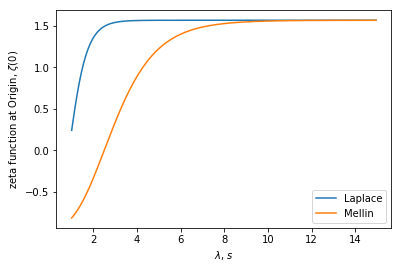

In [6]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

# Create graph
G = nx.Graph([(1,3),(2,3),(3,5),(3,4),(4,6),(5,8),(5,7),(7,8),(8,9),(9,10)])

# set list of s or lambda parameters
ss = np.arange(1,15,0.05)

z_l1 = []
z_l2 = []

#iterate over the parameters computing the value of zeta function at origin for the normalised generalised laplacian matrix
for s in ss:
   z_l1.append(zeta_function_origin(sorted(eigvals(normalised_genlap(kplaplacian_ltf(G,s)))))) 
   z_l2.append(zeta_function_origin(sorted(eigvals(normalised_genlap(kplaplacian_mtf(G,s))))))

#plot
plt.plot(ss,z_l1, label='Laplace')
plt.plot(ss,z_l2, label ='Mellin')
plt.xlabel('$\lambda$, $s$')
plt.ylabel('zeta function at Origin, $\zeta(0)$')
plt.legend()
plt.show()

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


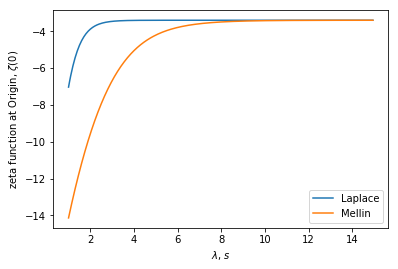

In [7]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

# Create graph
G = nx.Graph([(1,3),(2,3),(3,5),(3,4),(4,6),(5,8),(5,7),(7,8),(8,9),(9,10)])


# set list of s or lambda parameters
ss = np.arange(1,15,0.05)


z_l1 = []
z_l2 = []


#iterate over the parameters computing the value of zeta function at origin for the generalised laplacian matrix
for s in ss:
   z_l1.append(zeta_function_origin(sorted(eigvals(kplaplacian_ltf(G,s))))) 
   z_l2.append(zeta_function_origin(sorted(eigvals(kplaplacian_mtf(G,s)))))


# plot
plt.plot(ss,z_l1, label='Laplace')
plt.plot(ss,z_l2, label ='Mellin')

plt.xlabel('$\lambda$, $s$')
plt.ylabel('zeta function at Origin, $\zeta(0)$')
plt.legend()
plt.show()

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


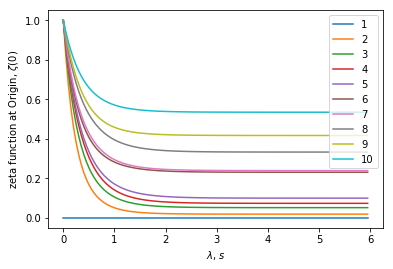

In [43]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G = nx.Graph([(1,3),(2,3),(3,5),(3,4),(4,6),(5,8),(5,7),(7,8),(8,9),(9,10)])
n = len(G.nodes())

ss = np.arange(0,6,0.05)
z_l1 = []
z_l2 = []
nn = 1.0/n

for s in ss:
   z_l1 = [nn*ee for ee in sorted(eigvals(kplaplacian_ltf(G,s)))]
   #z_l2 = sorted(eigvals(normalised_genlap(kplaplacian_mtf(G,s))))
   #plt.plot(z_l1, label = str(s))
   #plt.plot(z_l2, label = str(s))
   z_l2.append(z_l1)



for i in range(0, n):
    zz = []
    for z in z_l2:
        zz.append(z[i])
    plt.plot(ss, zz, label = str(i+1))

plt.xlabel('$\lambda$, $s$')
plt.ylabel('zeta function at Origin, $\zeta(0)$')
plt.legend()
plt.show()

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


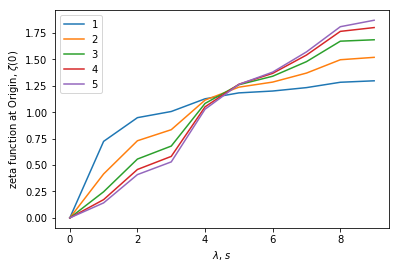

In [9]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G = nx.Graph([(1,3),(2,3),(3,5),(3,4),(4,6),(5,8),(5,7),(7,8),(8,9),(9,10)])


ss = np.arange(1,6)
z_l1 = []
z_l2 = []

for s in ss:
   #z_l1 = sorted(eigvals(normalised_genlap(kplaplacian_ltf(G,s))))
   z_l2 = sorted(eigvals(normalised_genlap(kplaplacian_mtf(G,s))))
   #plt.plot(z_l1, label = str(s))
   plt.plot(z_l2, label = str(s))

plt.xlabel('$\lambda$, $s$')
plt.ylabel('zeta function at Origin, $\zeta(0)$')
plt.legend()
plt.show()

In [10]:
print(sorted(eigvals(normalised_genlap(kplaplacian_ltf(G,10)))))

[(8.326672684688674e-17+0j), (0.1185880355337486+0j), (0.3657674638523923+0j), (0.4793539001961577+0j), (1.0000000020611532+0j), (1.2572090827545421+0j), (1.387419406034974+0j), (1.5953335383028493+0j), (1.8501640526995207+0j), (1.9461645185646597+0j)]


In [11]:
print(sorted(eigvals(normalised_genlap(kplaplacian_mtf(G,10)))))

[(1.8041124150158794e-16+0j), (0.11913791167229273+0j), (0.36696172430788143+0j), (0.4807934251666894+0j), (1.0009736594866911+0j), (1.2574913043462959+0j), (1.3872731007342274+0j), (1.594751114978132+0j), (1.848941718507849+0j), (1.94367604079994+0j)]


/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


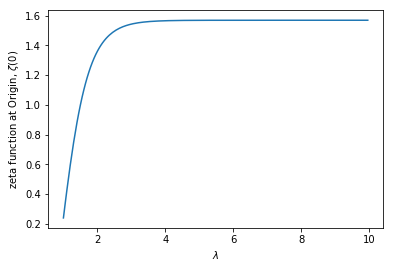

In [12]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G = nx.Graph([(1,3),(2,3),(3,5),(3,4),(4,6),(5,8),(5,7),(7,8),(8,9),(9,10)])

l1 = sorted(eigvals(nx.normalized_laplacian_matrix(G).todense()))


ss = np.arange(1,10,0.05)
z_l1 = []
z_l2 = []
z_l3 = []
z_l4 = []
z_l5 = []
for s in ss:
   z_l1.append(zeta_function_origin(sorted(eigvals(normalised_genlap(kplaplacian_ltf(G,s)))))) 
   


plt.plot(ss,z_l1)

plt.xlabel('$\lambda$')
plt.ylabel('zeta function at Origin, $\zeta(0)$')
plt.legend()
plt.show()